In [1]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
dataset_path = 'spam.csv'
df = pd.read_csv(dataset_path, encoding='latin-1')  # Adjust encoding if needed

# Display the first few rows of the dataset to understand its structure
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# Data cleaning

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [3]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Display basic information about the dataset
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5169 non-null   object
 1   v2          5169 non-null   object
 2   Unnamed: 2  43 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  5 non-null      object
dtypes: object(5)
memory usage: 242.3+ KB


In [4]:
# Display class distribution (ham/spam)
print("\nClass distribution:")
df['v1'].value_counts()


Class distribution:


v1
ham     4516
spam     653
Name: count, dtype: int64

In [5]:
# Drop last 3 columns
df = df.iloc[:, :2]

# Rename columns
df.columns = ['target', 'text']

# Display the updated DataFrame
print("\nUpdated DataFrame:")
df.head()


Updated DataFrame:


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


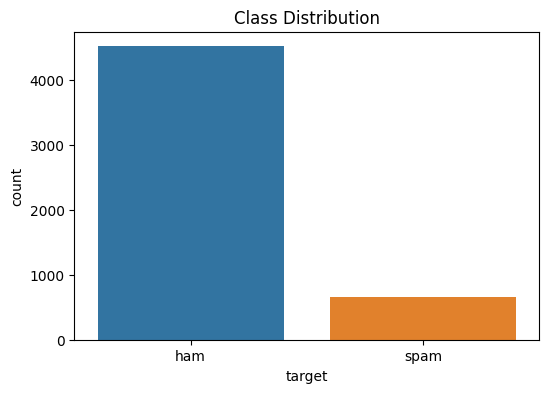

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

# Distribution of classes
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

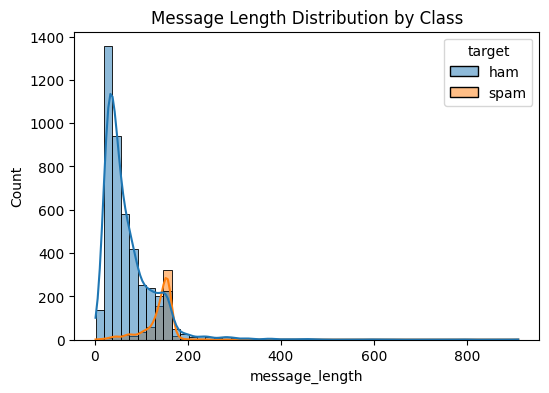

In [7]:
# Message length distribution
df['message_length'] = df['text'].apply(len)
plt.figure(figsize=(6, 4))
sns.histplot(df, x='message_length', hue='target', bins=50, kde=True)
plt.title('Message Length Distribution by Class')
plt.show()

In [8]:
# Display summary statistics of message length
print("\nSummary statistics of message length:")
df.groupby('target')['message_length'].describe()


Summary statistics of message length:


,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
ham,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
spam,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0


In [9]:
# Display word cloud for spam and ham messages
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

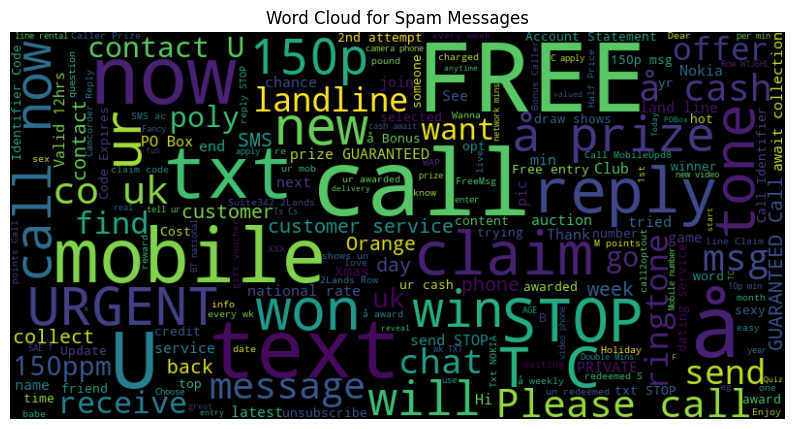

In [10]:
# Word cloud for spam messages
spam_text = ' '.join(df[df['target'] == 'spam']['text'])
generate_wordcloud(spam_text, 'Word Cloud for Spam Messages')


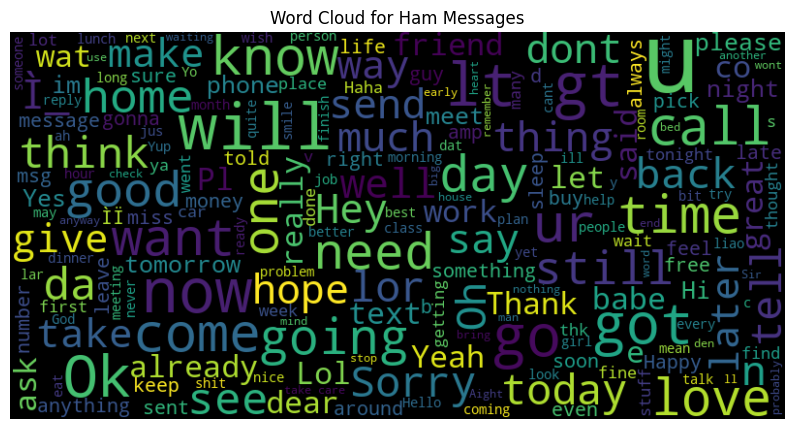

In [11]:
# Word cloud for ham messages
ham_text = ' '.join(df[df['target'] == 'ham']['text'])
generate_wordcloud(ham_text, 'Word Cloud for Ham Messages')

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download NLTK resources (uncomment the following two lines if not already downloaded)
# nltk.download('stopwords')
# nltk.download('punkt')

# Data Preprocessing

# Lowercasing
df['text'] = df['text'].str.lower()

# Tokenization
df['tokens'] = df['text'].apply(nltk.word_tokenize)

# Remove special characters, stop words, and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(tokens):
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    tokens = [token for token in tokens if token not in punctuation]  # Remove punctuation
    return tokens

df['tokens'] = df['tokens'].apply(preprocess_text)

# Stemming
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

# Display the preprocessed DataFrame
print("\nPreprocessed DataFrame:")
df.head()


Preprocessed DataFrame:


,target,text,message_length,tokens
0,ham,"go until jurong point, crazy.. available only ...",111,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,ok lar... joking wif u oni...,29,"[ok, lar, joke, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor... u c already then say...,49,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...",61,"[nah, think, goe, usf, live, around, though]"


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [15]:
# Convert text data to numerical features using Bag-of-Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [16]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
epochs = 10
for epoch in range(epochs):
    classifier.fit(X_train_bow, y_train)

In [17]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_bow)

In [18]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [19]:
# Display the model evaluation metrics
print("\nMultinomial Naive Bayes Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Multinomial Naive Bayes Model Evaluation Metrics:
Accuracy: 0.9855

Confusion Matrix:
[[887   2]
 [ 13 132]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [20]:
# Save the trained Multinomial Naive Bayes classifier
with open('multinomial_nb_classifier.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)

# Save the CountVectorizer
with open('count_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [23]:
pip install pyaudio

Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (1827435722.py, line 1)